In [1]:
import numpy as np
from math import sin,cos,pi
from funcoesTermosol import *

In [2]:
numNo,matrixNo,numMemb,matrixInc,numCar,vetorFor,numRes,vetorRes = importa("entrada-aps.xlsx")
# print(matrixNo,"\n")
# print(matrixInc)

<img src="EstruturaNumerada2.png">

In [3]:
plota(matrixNo,matrixInc)

<Figure size 640x480 with 1 Axes>

In [4]:
class no:
    def __init__(self, num, ponto):
        self.x = ponto[0]
        self.y = ponto[1]
        self.num = num
        self.graux = num*2 - 1
        self.grauy = num*2

In [5]:
class barra:
    def __init__(self,E,A, no1, no2):
        self.no1 = no1
        self.no2 = no2
        self.E = E
        self.A = A
        self.L = ((no2.x - no1.x)**2+(no2.y - no1.y)**2)**0.5
        s = (no2.y - no1.y)/self.L
        c = (no2.x - no1.x)/self.L
        self.matrix = (self.E*self.A/self.L)*np.array([[c**2,c*s,-c**2,-c*s],
                                                       [c*s,s**2,-c*s,-s**2],
                                                       [-c**2,-c*s,c**2,c*s],
                                                       [-c*s,-s**2,c*s,s**2]])
        
        self.listagraus = [no1.graux, no1.grauy, no2.graux, no2.grauy]
        self.forcainterna = None
        self.tensao = None
        self.defesp = None
        
    def calculaTudo(self, desno1x, desno1y,desno2x,desno2y):
        s = (self.no2.y - self.no1.y)/self.L
        c = (self.no2.x - self.no1.x)/self.L
        self.defesp = (-c*desno1x-s*desno1y+c*desno2x+s*desno2y)/self.L
        self.tensao = self.E*self.defesp
        self.forcainterna = self.tensao*self.A
        return self.defesp,self.tensao, self.forcainterna
            


In [6]:
def simplificaGeral(matrix, vetorRes):
    newMatrix = np.delete(matrix, (vetorRes), axis=0)
    newMatrix = np.delete(newMatrix, (vetorRes), axis=1)
    return newMatrix

def simplificaSimples(matrix, vetorRes):
    newMatrix = np.delete(matrix, (vetorRes), axis=0)
    return newMatrix


In [7]:
def matrixKg(listaBarra, numNos):
    n = len(listaBarra)
    zero = np.zeros((numNos*2,numNos*2))
    for bar in listaBarra:
        zero[bar.listagraus[0]-1:bar.listagraus[1],bar.listagraus[0]-1:bar.listagraus[1]] += bar.matrix[0:2,0:2]
        
        zero[bar.listagraus[0]-1:bar.listagraus[1],bar.listagraus[2]-1:bar.listagraus[3]] += bar.matrix[0:2,2:4]
        
        zero[bar.listagraus[2]-1:bar.listagraus[3],bar.listagraus[0]-1:bar.listagraus[1]] += bar.matrix[2:4,0:2]
        
        zero[bar.listagraus[2]-1:bar.listagraus[3],bar.listagraus[2]-1:bar.listagraus[3]] += bar.matrix[2:4,2:4]

    return zero


In [8]:
def jacobi(matrixRigidez, matrixForca, tolerancia):
    size = len(matrixRigidez)
    matrixDeslocamento = np.array([[0.0]]*size)
    loop = True
    while loop:
        comp = matrixDeslocamento.copy()
        for n in range(size):
            R = matrixForca[n][0]
            for i in range(size):
                R -= matrixRigidez[n][i]*matrixDeslocamento[i][0]
            R += matrixRigidez[n][n]*matrixDeslocamento[n][0]
            R = R/matrixRigidez[n][n]    
            matrixDeslocamento[n][0] = R
        if(max(abs(comp - matrixDeslocamento))[0] < tolerancia):
            loop = False
    return matrixDeslocamento
            
        
        


In [9]:
# def matrixKg(listaMatrix):
#     n = len(listaMatrix)
#     zero = np.zeros((n+1,n+1))
#     for i,mat in enumerate(listaMatrix):
#         zero[i][i] = mat[0][0]
#         zero[i][i+1] = mat[0][1]
#         zero[i+1][i] = mat[1][0]
#         zero[i+1][i+1] = mat[1][1]
#     return zero
    

In [10]:
listaNo = []
for i in range(numNo):
    n = no(i+1, [matrixNo[0][i],matrixNo[1][i]])
    listaNo.append(n)


In [11]:
listaBarra = []
for i in range(len(matrixInc)):
    b = barra(matrixInc[i][2],matrixInc[i][3],listaNo[int(matrixInc[i][0]) - 1],listaNo[int(matrixInc[i][1]) - 1])
    listaBarra.append(b)
#     print(b.listagraus)

In [12]:
Kg = matrixKg(listaBarra, numNo)

In [13]:
simpleKg = simplificaGeral(Kg,vetorRes)
simpleVetorFor = simplificaSimples(vetorFor,vetorRes)

C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\55419\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  import sys


In [14]:
deslocamento = np.linalg.solve(simpleKg,simpleVetorFor)
# deslocamento

In [15]:
# jacobi(simpleKg,simpleVetorFor, 1e-12)

In [16]:
listadeslocamento = [[float(i)] for i in deslocamento]
listaRes = [int(i) for i in vetorRes]
for n in range(len(listaNo)*2):
    if(n in listaRes):
        listadeslocamento.insert(n,[0])
listadeslocamento = np.array(listadeslocamento)

In [17]:
newMatrixNo = matrixNo.copy()
for idx,valor in enumerate(listadeslocamento):
    if(idx%2==0):
        newMatrixNo[0][int(idx/2)] += valor[0]*3e3
    else:
        newMatrixNo[1][int(idx/2)] += valor[0]*3e3
print(matrixNo)
print(newMatrixNo)

[[ 0.  4.  4.  8.  8. 12. 12. 16.]
 [ 0.  4.  0.  4.  0.  4.  0.  0.]]
[[ 0.          4.01683154  3.96952381  8.          8.         11.98316846
  12.03047619 16.        ]
 [ 0.          3.93556169  0.          3.79712444 -0.20287556  3.93556169
   0.          0.        ]]


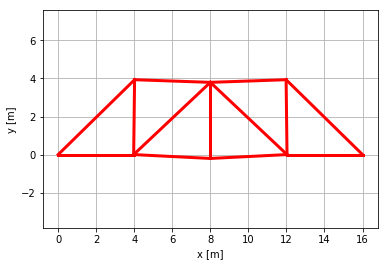

In [18]:
plota(newMatrixNo,matrixInc)

In [19]:
listaDef = []
listaTensao = []
listaForcaInterna = []

for b in listaBarra:
    dx1 = listadeslocamento[b.no1.graux-1]
    dy1 = listadeslocamento[b.no1.grauy-1]
    dx2 = listadeslocamento[b.no2.graux-1]
    dy2 = listadeslocamento[b.no2.grauy-1]
#     print("dx1: {0}, dy1: {1}, dx2: {2}, dy2: {3}".format(dx1,dy1,dx2,dy2))
    defor,tens,fi = b.calculaTudo(dx1,dy1,dx2,dy2)
    listaDef.append(defor)
    listaTensao.append(tens)
    listaForcaInterna.append(fi)
listaDef = np.array(listaDef)
listaTensao = np.array(listaTensao)
listaForcaInterna = np.array(listaForcaInterna)

In [62]:
def achaBarra(no):
    listaFinal=[]
    for i in range(len(matrixInc)):
        print(int(matrixInc[i][0]))
        if ((no == int(matrixInc[i][0])) or (no == int(matrixInc[i][1]))):
             listaFinal.append(i)
    return listaFinal

listaReacao=[0]*numNo*2
for i in vetorRes:
    pass
#     listaReacao.insert(int(i[0]),[-listaForcaInterna[int(i)[0]][0]])
#     print(listaForcaInterna[int(i[0])])
print(achaBarra(1))

1
1
2
2
3
3
4
4
4
5
6
6
7
[0, 1]


In [20]:
geraSaida("saida",listaReacao,listadeslocamento,listaDef,listaTensao,listaForcaInterna)